# Simulação de Funcionários de TI

*  Para a análise abaixo foi utilizado dados do "Simulação de dados de funcionários: indústria de TI" disponibilizados no site www.kaggle.com.

*  Esse conjunto
contém dados simulados de 400 funcionários trabalhando em vários cargos relacionados a TI. Os dados incluem detalhes sobre o gênero de cada funcionário, anos de experiência, cargo e salário. O conjunto de dados visa refletir distribuições e variações realistas dentro do setor de TI, particularmente como os salários tendem a aumentar com a experiência e a função específica do trabalho.

*  Algumas perguntas a serem respondidas:


1.   Quantidade de Funcionários por Genêro?
2.   Qual setor da TI que paga mais?
3.   Os anos de Experiência tem algum impacto no salário do funcionário?


*  Fonte do Dataset: https://www.kaggle.com/datasets/abhayayare/employee-data-simulation-it-industry?resource=download

In [2]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importando Dataset
funcionarios = pd.read_csv('employee_data.csv', delimiter=';')
funcionarios.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [4]:
#Verificando dimensão do Dataset
funcionarios.shape

(400, 5)

In [5]:
#renomeando as colunas do Dataset
funcionarios.rename(columns = {
      'ID' : 'ID',
      'Gender' : 'genero',
      'Experience (Years)' : 'experiencia',
      'Position' : 'posicao',
      'Salary' : 'salario'
  },inplace=True)

In [6]:
#verificando os dados de cada Dataset
funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           400 non-null    int64 
 1   genero       400 non-null    object
 2   experiencia  400 non-null    int64 
 3   posicao      400 non-null    object
 4   salario      400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


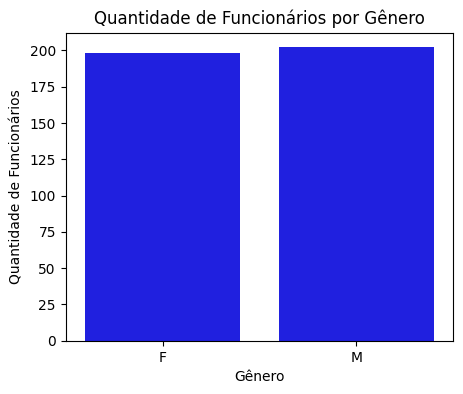

In [7]:
#quantidade de funcionarios há na empresa por gênero
qnt_func = funcionarios.groupby('genero')['ID'].count().reset_index()

_=plt.figure(figsize=(5,4))
_=sns.barplot(data=qnt_func, x='genero', y='ID', color='blue')
_=plt.title('Quantidade de Funcionários por Gênero')
_=plt.xlabel('Gênero')
_=plt.ylabel('Quantidade de Funcionários')
_=plt.show()


In [8]:
qnt_func = funcionarios.groupby('genero')['ID'].count().reset_index()
qnt_func

,genero,ID
0,F,198
1,M,202


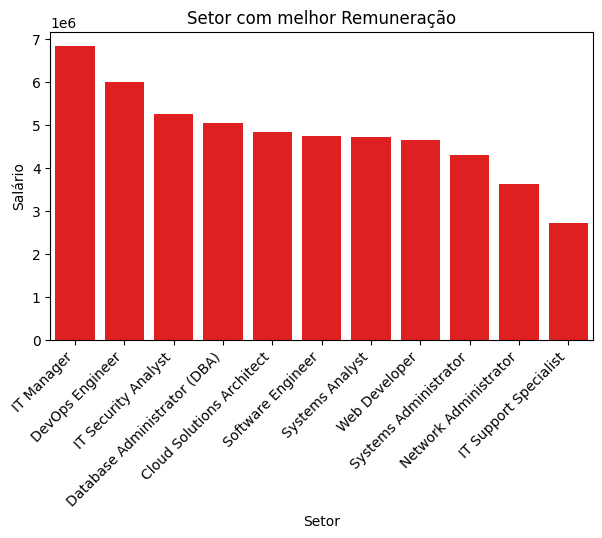

In [9]:
#qual o setor da TI que paga mais
setor_mais_paga = funcionarios.groupby('posicao')['salario'].sum().reset_index()
setor_mais_paga = setor_mais_paga.sort_values(by='salario', ascending=False)
_=plt.figure(figsize=(7,4))
_=sns.barplot(data=setor_mais_paga, x='posicao', y='salario', color='red')
_=plt.title('Setor com melhor Remuneração')
_=plt.xlabel('Setor')
_=plt.ylabel('Salário')
_=plt.xticks(rotation=45, ha='right')
_=plt.show()


In [10]:
setor_mais_paga = funcionarios.groupby('posicao')['salario'].sum().reset_index()
setor_mais_paga = setor_mais_paga.sort_values(by='salario', ascending=False)
setor_mais_paga

,posicao,salario
3,IT Manager,6828462
2,DevOps Engineer,5988786
4,IT Security Analyst,5243192
1,Database Administrator (DBA),5048853
0,Cloud Solutions Architect,4825249
7,Software Engineer,4728867
9,Systems Analyst,4723353
10,Web Developer,4654239
8,Systems Administrator,4298463
6,Network Administrator,3622817


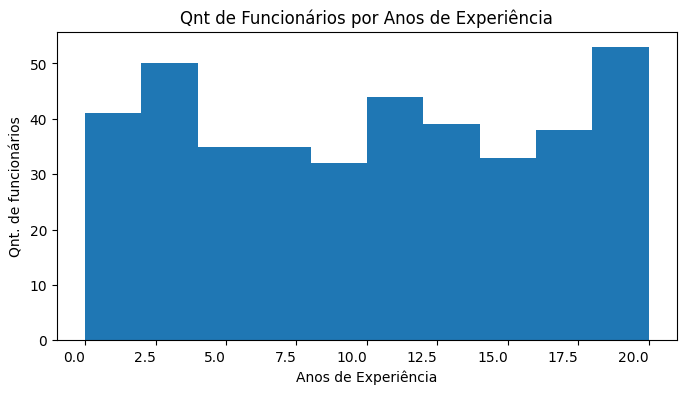

In [58]:
#histograma de funcionarios por ano de empresa
plt.figure(figsize=(8,4))
plt.hist(funcionarios.experiencia)
plt.title('Qnt de Funcionários por Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Qnt. de funcionários')
_=plt.xticks(ha='right')


In [71]:
qnt_funcionario_por_experiencia = funcionarios.groupby('experiencia')['ID'].count().reset_index()
qnt_funcionario_por_experiencia

,experiencia,ID
0,0,17
1,1,24
2,2,24
3,3,26
4,4,18
5,5,17
6,6,18
7,7,17
8,8,13
9,9,19


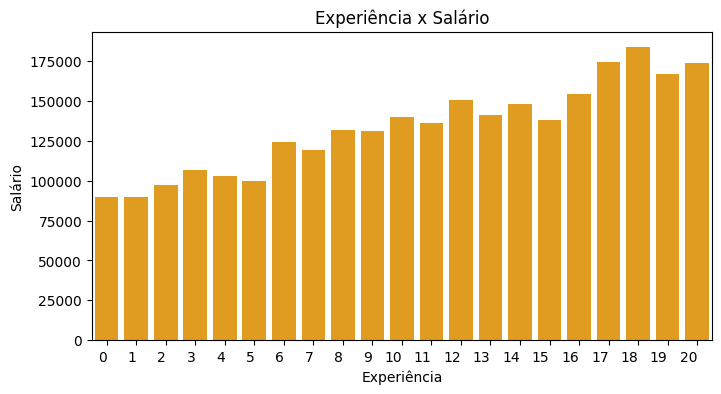

In [52]:
#grafico para saber de a experiencia dos funcionarios influencia na media salarial
media_salario = funcionarios.groupby('experiencia')['salario'].mean().reset_index()
media_salario = media_salario.sort_values(by='salario', ascending=False)

_=plt.figure(figsize=(8,4))
_=sns.barplot(data=media_salario, x='experiencia', y='salario', color='orange')
_=plt.title('Experiência x Salário')
_=plt.xlabel('Experiência')
_=plt.ylabel('Salário')
_=plt.xticks (ha='right')
_=plt.show()

In [48]:
media_salario = funcionarios.groupby('experiencia')['salario'].mean().reset_index()
media_salario = media_salario.sort_values(by='salario', ascending=False)
media_salario

,experiencia,salario
18,18,183780.933333
17,17,174208.411765
20,20,173898.750000
19,19,166689.409091
16,16,153962.714286
12,12,150728.111111
14,14,147747.050000
13,13,141060.857143
10,10,139718.636364
15,15,138020.384615
